# Customer Churn Analysis

**Customer churn** refers to the phenomenon where customers stop doing business with a company or stop using a service. It's a critical metric for businesses, especially those in subscription-based industries, as it directly impacts revenue and growth potential.

Churn rate is calculated with the following formula:



$$ \text{Churn Rate} = \frac{\text{Lost Customers}}{\text{Total Customers at the start period}} \times 100 $$


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

%matplotlib inline

In [ ]:
# Load dataset
churn_data = pd.read_csv(r'C:\Users\klawa\Downloads\customer_churn_data.csv')
churn_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [ ]:
# Remove serialized dataset referencing customer id
churn_data = churn_data.drop(['customerID'], axis =1)
churn_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,Yes,23,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,Female,0,Yes,No,43,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,Male,1,No,No,51,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,Male,1,No,No,72,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,Male,1,No,No,25,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
5876,Male,0,No,No,22,Yes,Yes,DSL,No,No,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,No,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No


In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5880 non-null   object 
 1   SeniorCitizen     5880 non-null   int64  
 2   Partner           5880 non-null   object 
 3   Dependents        5880 non-null   object 
 4   tenure            5880 non-null   int64  
 5   PhoneService      5880 non-null   object 
 6   MultipleLines     5880 non-null   object 
 7   InternetService   5880 non-null   object 
 8   OnlineSecurity    5880 non-null   object 
 9   OnlineBackup      5880 non-null   object 
 10  DeviceProtection  5880 non-null   object 
 11  TechSupport       5880 non-null   object 
 12  StreamingTV       5880 non-null   object 
 13  StreamingMovies   5880 non-null   object 
 14  Contract          5880 non-null   object 
 15  PaperlessBilling  5880 non-null   object 
 16  PaymentMethod     5880 non-null   object 


In [ ]:
# Data preprocessing
# Handle missing values if any
churn_data.dropna(inplace=True)
churn_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,Yes,23,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,Female,0,Yes,No,43,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,Male,1,No,No,51,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,Male,1,No,No,72,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,Male,1,No,No,25,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
5876,Male,0,No,No,22,Yes,Yes,DSL,No,No,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,No,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No


In [ ]:
churn_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#numeric_features = churn_data.drop(['tenure','MonthlyCharges','TotalCharges'], axis=1)

cat_features = churn_data.drop(['tenure','MonthlyCharges','TotalCharges'], axis=1)

numeric_features = churn_data[['tenure','MonthlyCharges','TotalCharges']]

numeric_features

,tenure,MonthlyCharges,TotalCharges
0,23,49.85,1146.55
1,43,100.70,4330.10
2,51,97.33,4963.83
3,72,101.38,7299.36
4,25,52.22,1305.50
...,...,...,...
5875,71,74.21,5268.91
5876,22,65.43,1439.46
5877,68,59.78,4065.04
5878,14,91.88,1286.32


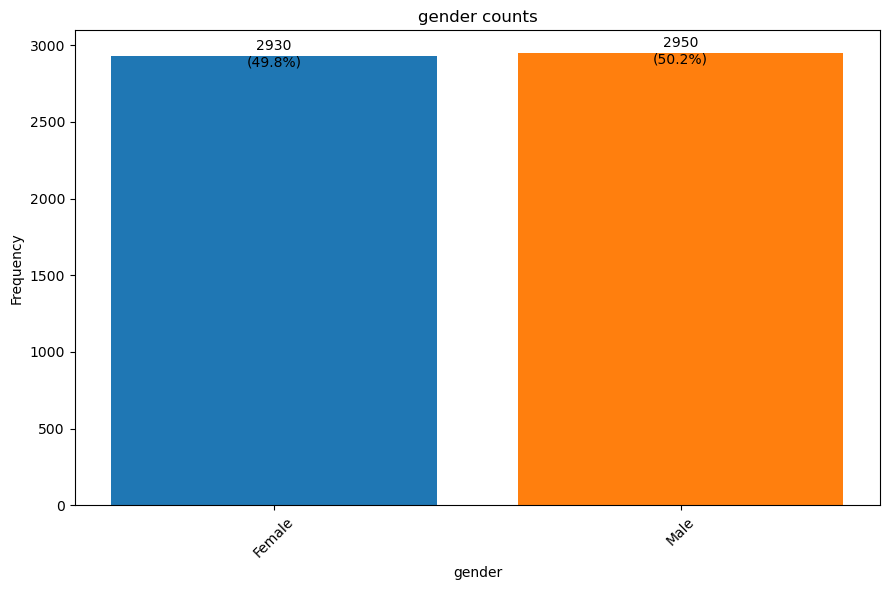

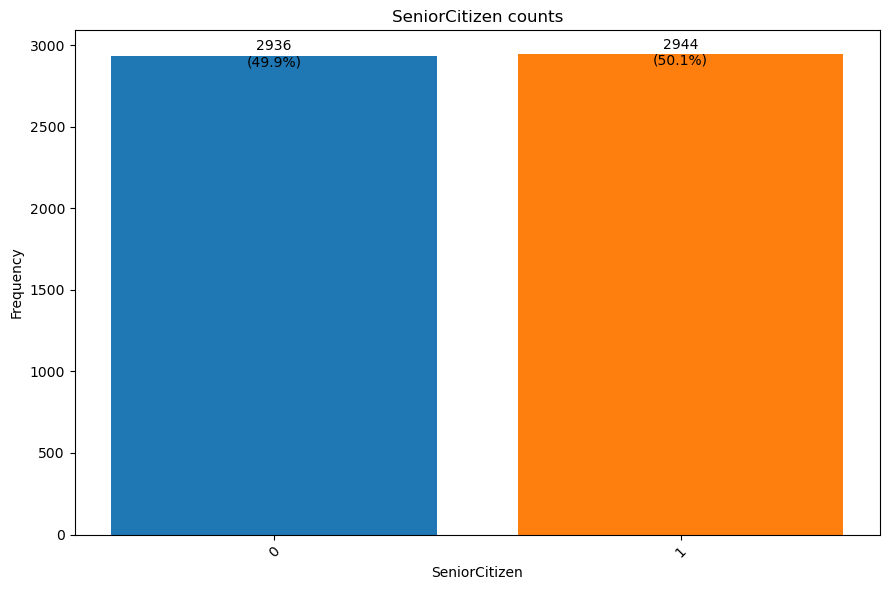

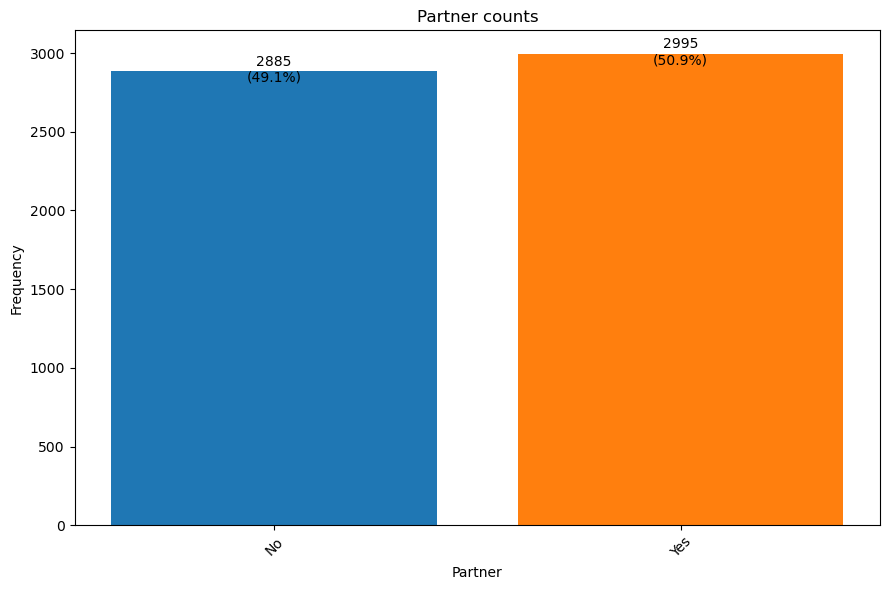

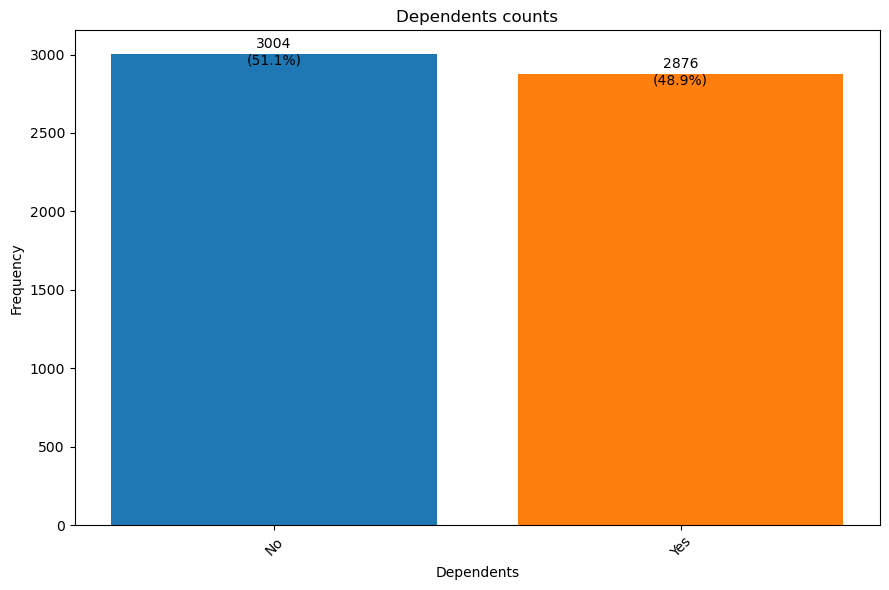

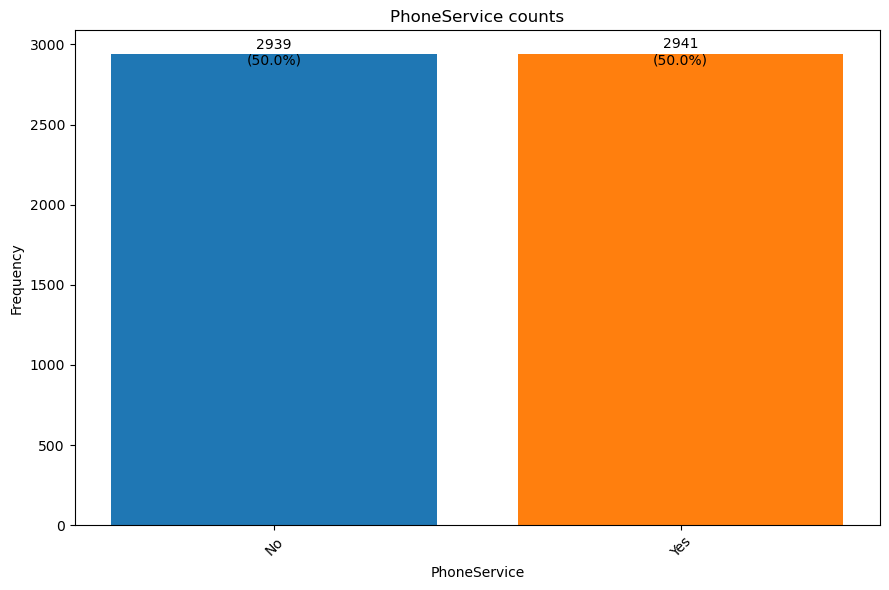

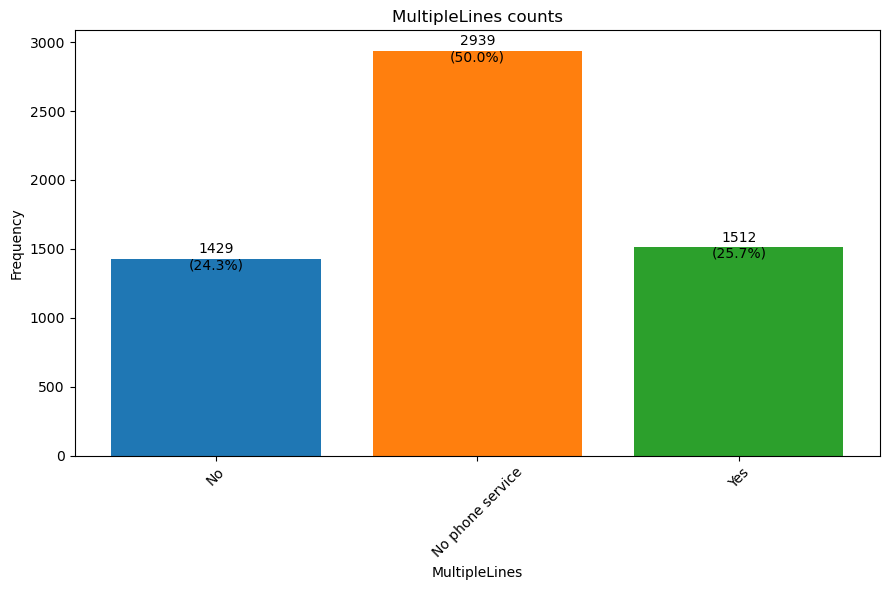

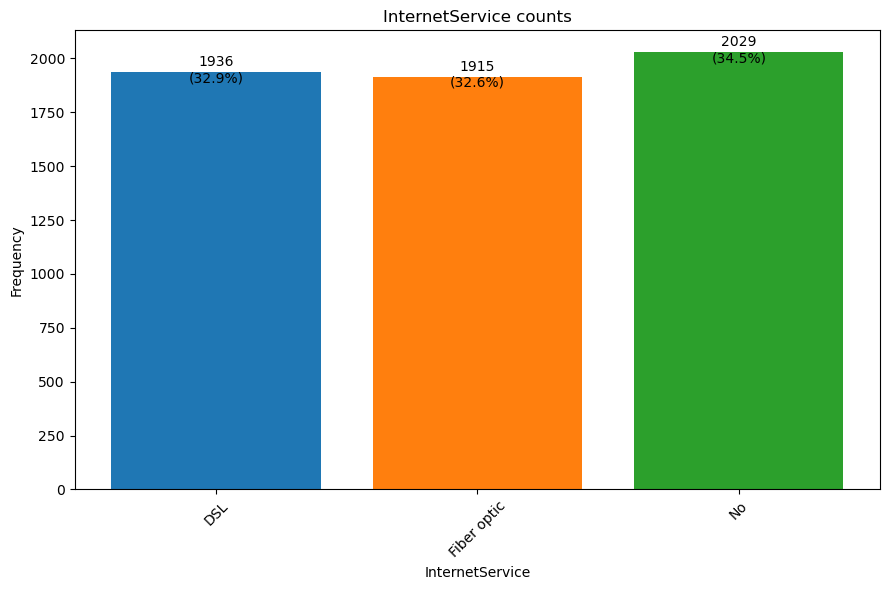

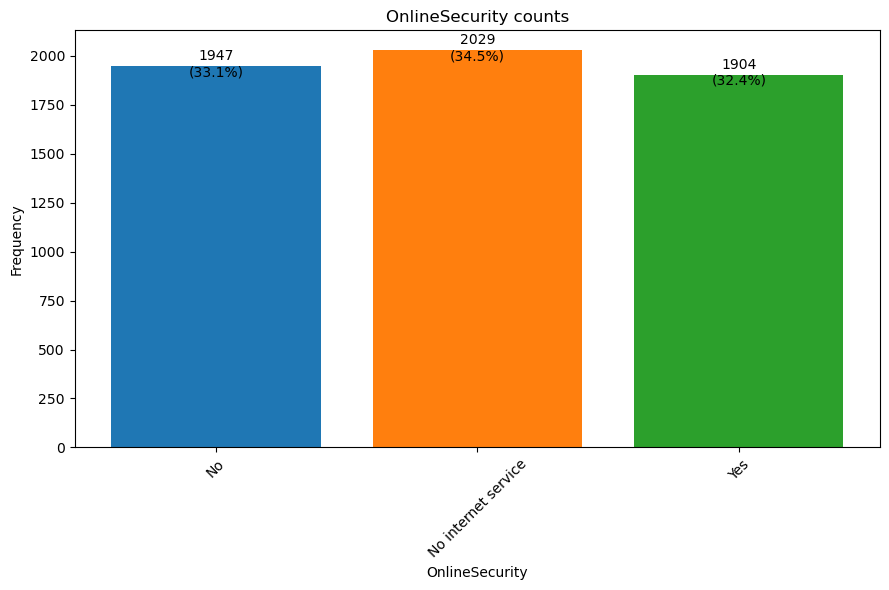

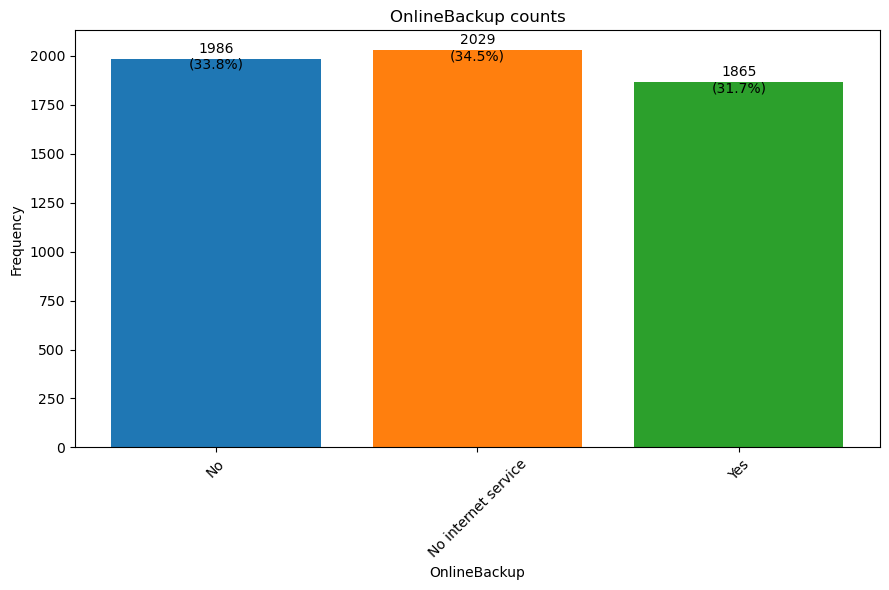

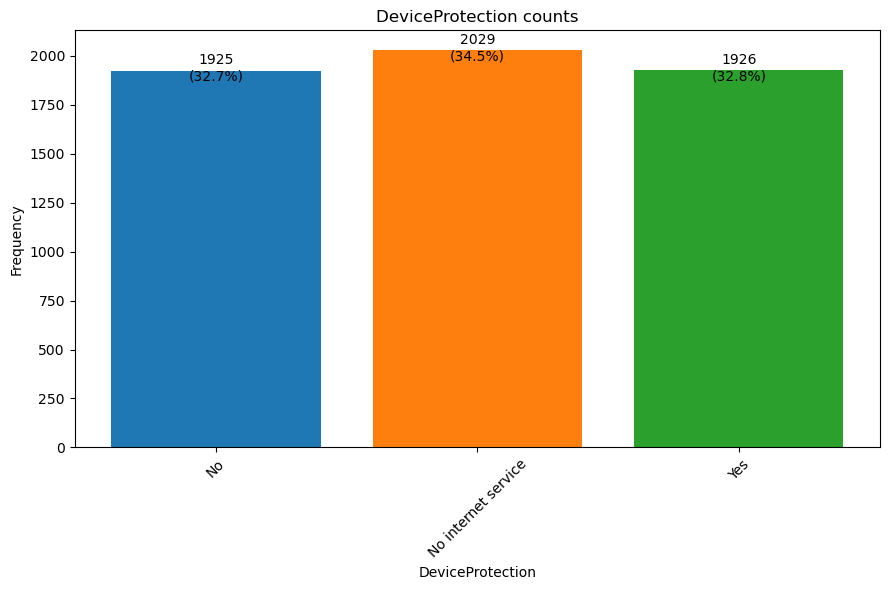

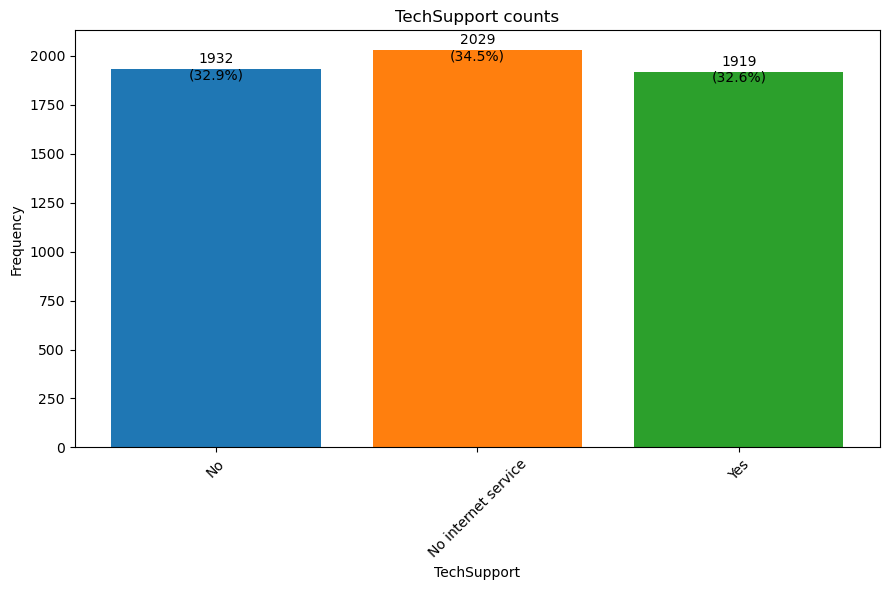

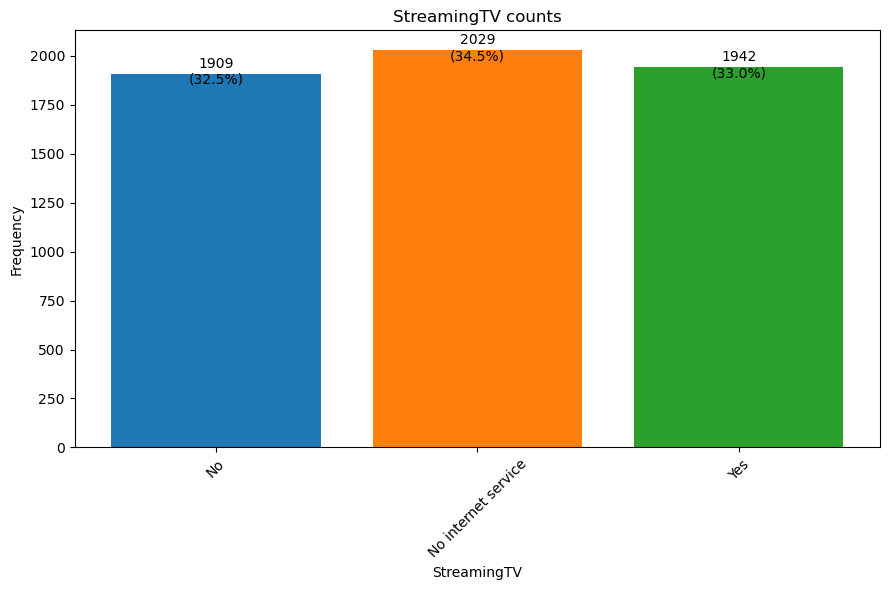

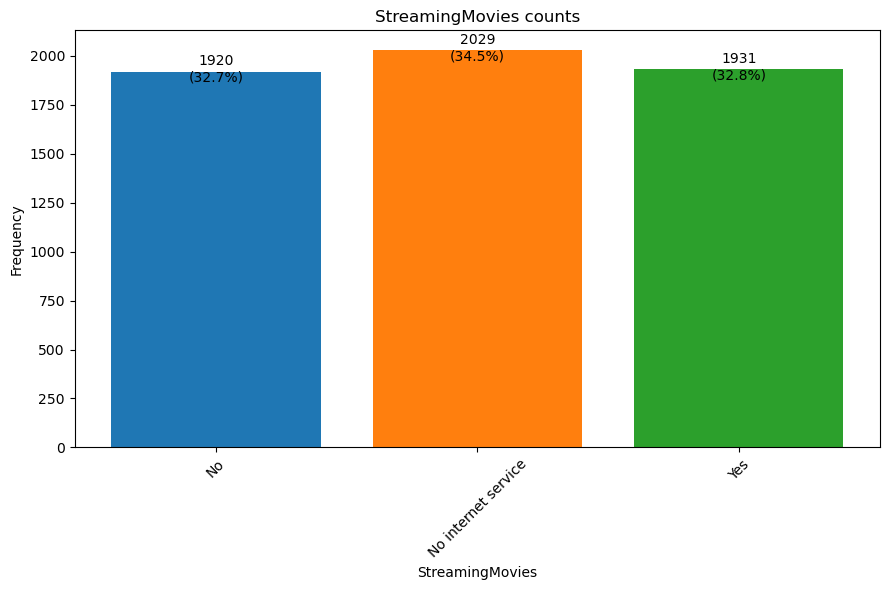

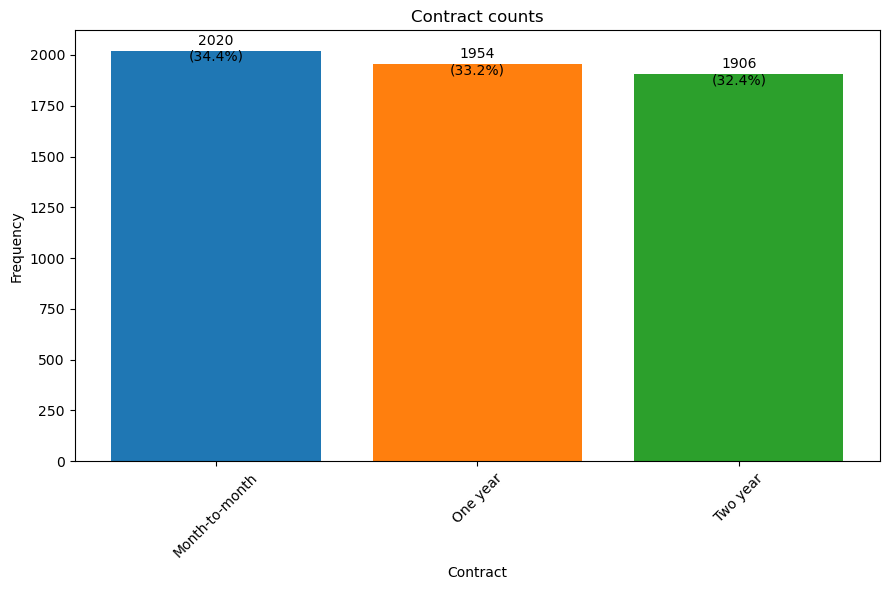

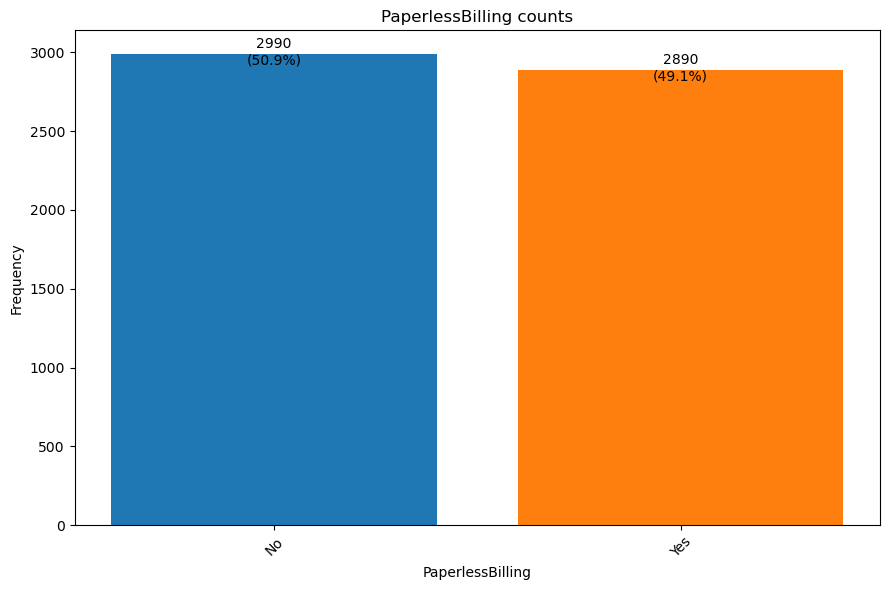

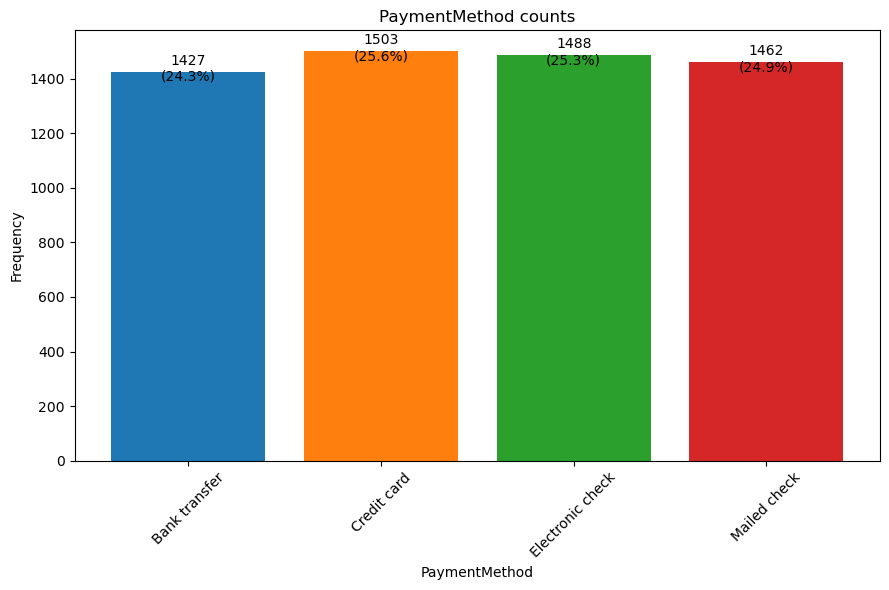

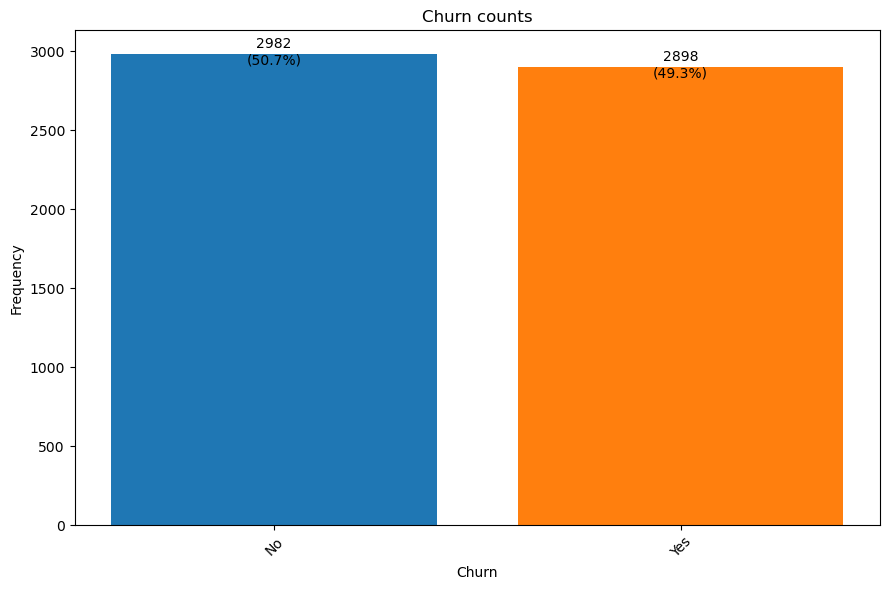

In [ ]:
# Calculate percentages of total data for each category

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for col in cat_features:
    counts = churn_data[col].value_counts().sort_index()
    total_count = counts.sum()
    percentages = counts / total_count * 100

    # Plotting
    fig, ax = plt.subplots(figsize=(9, 6))  # Create a new figure and axis for each feature
    bars = ax.bar(counts.index.astype(str), counts.values, color=colors[:len(counts)])  # Customize colors

    # Add data labels for count and percentage
    for i, bar in enumerate(bars):
        yval = bar.get_height()
        percentage = percentages.iloc[i]
        count_label = counts.iloc[i]
        ax.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{count_label}\n({percentage:.1f}%)', ha='center', va='center', color='black', fontsize=10)

    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if necessary
    plt.tight_layout()  # Adjust layout to prevent overlapping of labels

    plt.show()

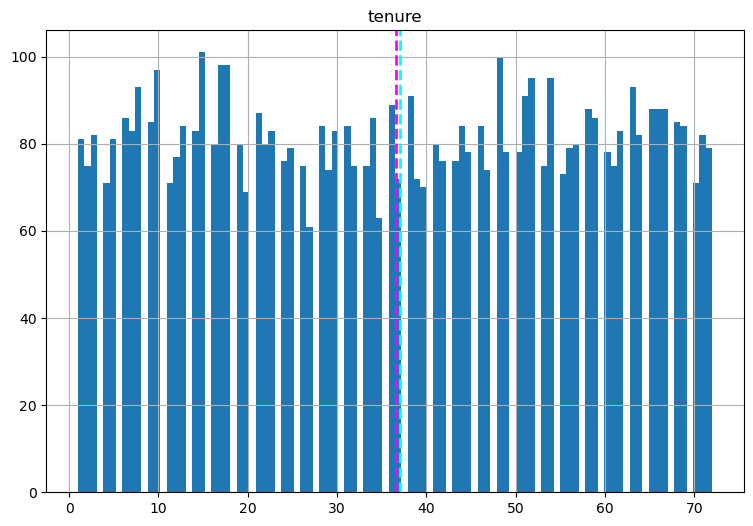

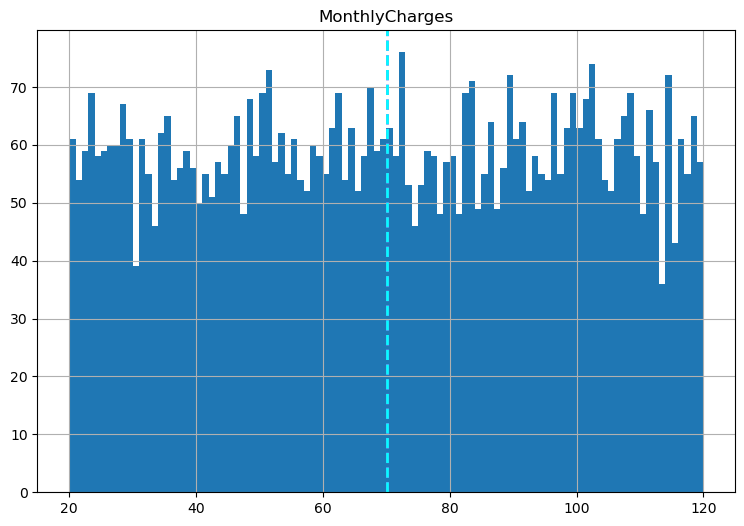

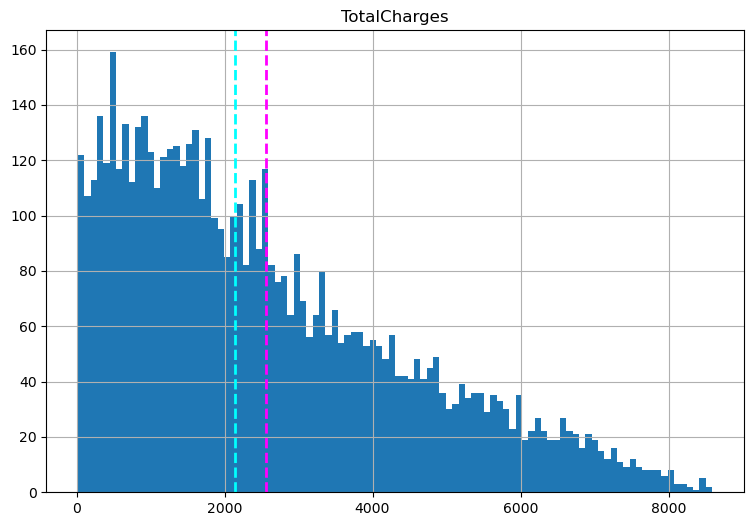

In [ ]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = churn_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


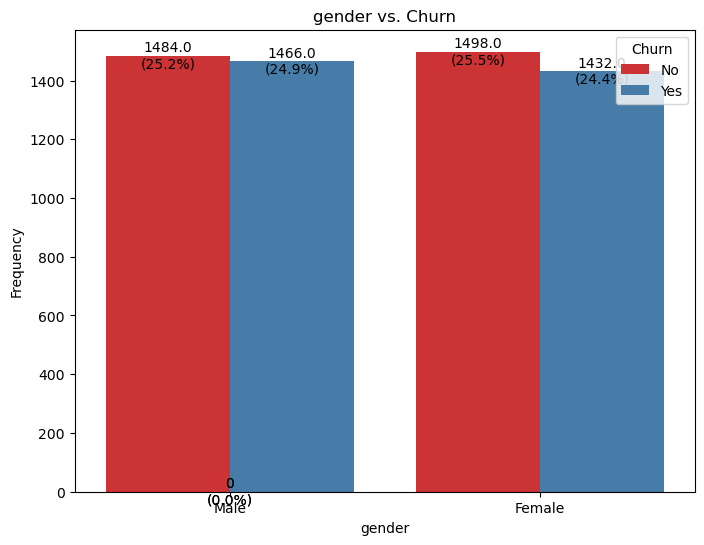

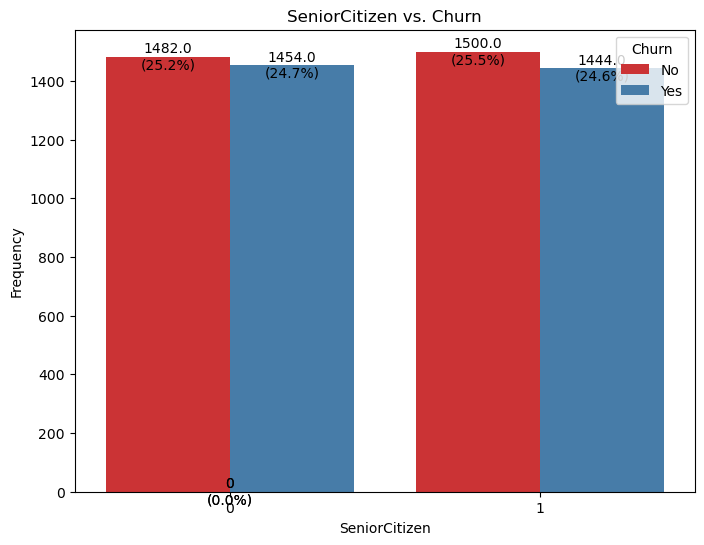

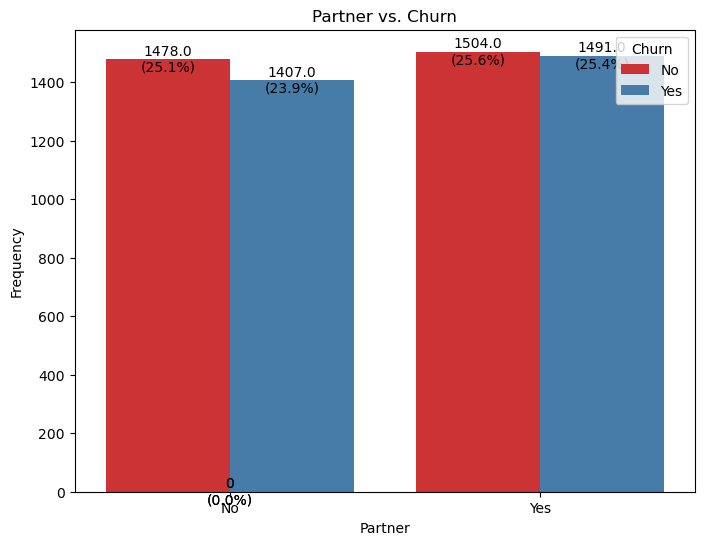

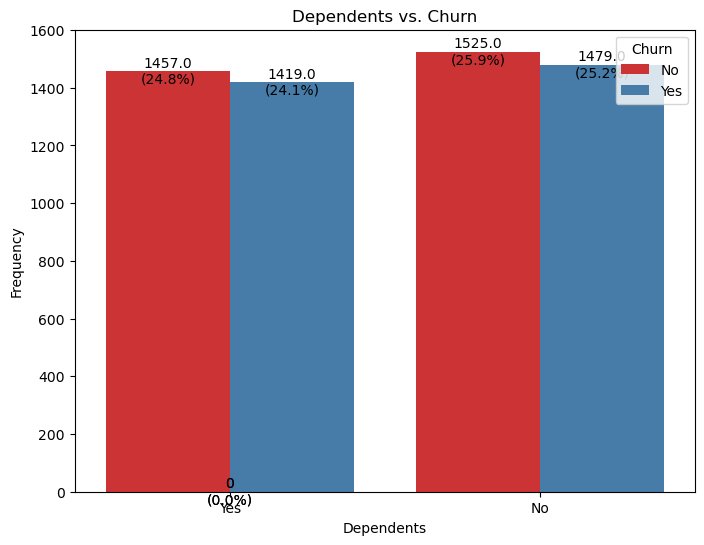

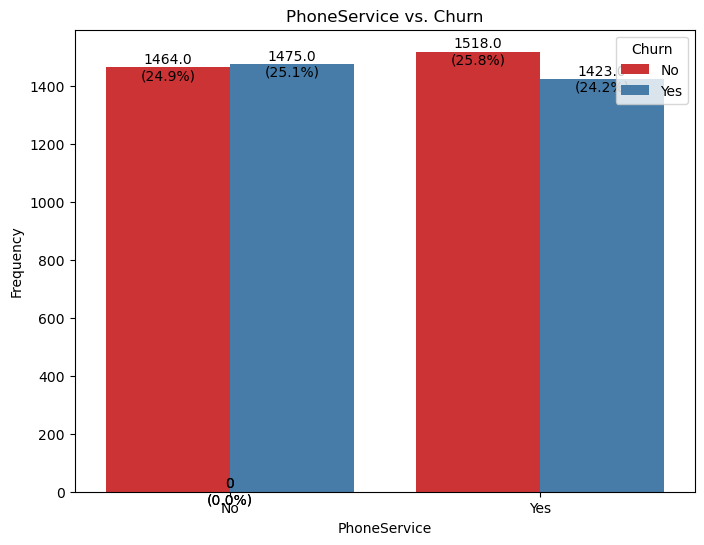

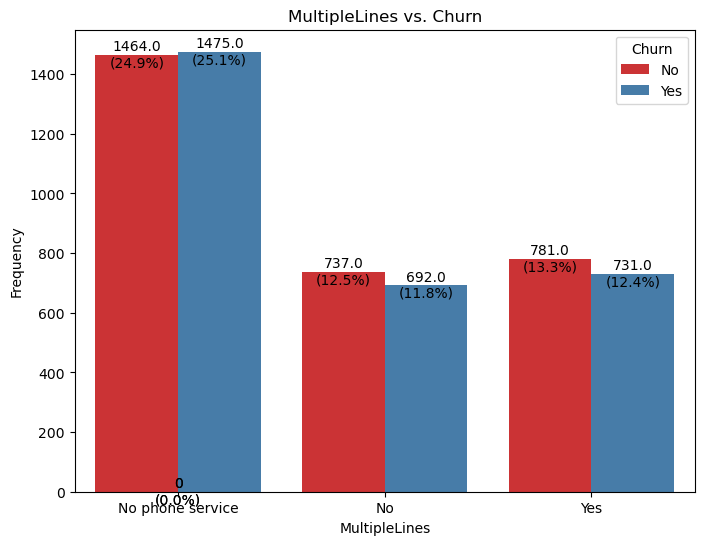

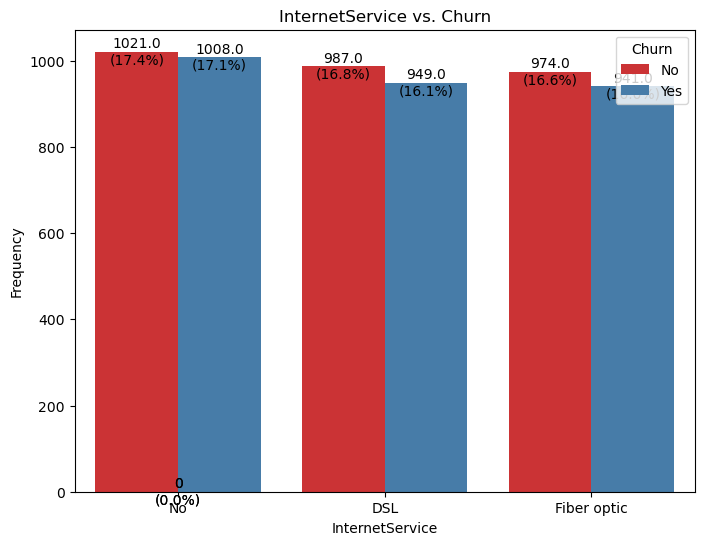

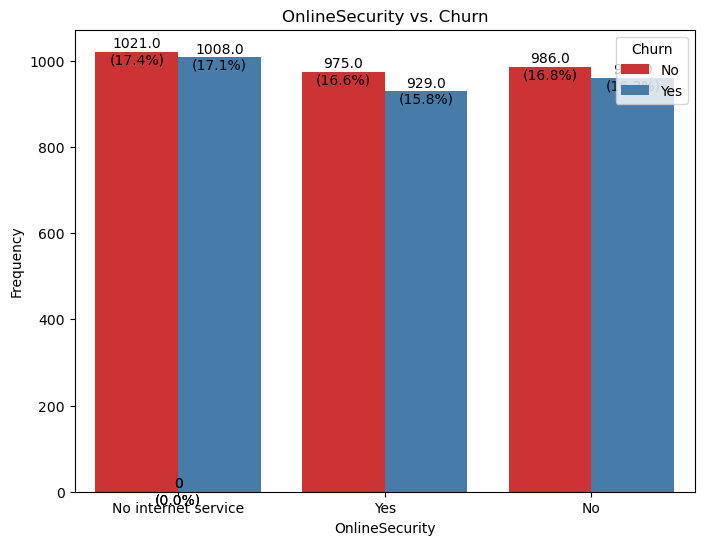

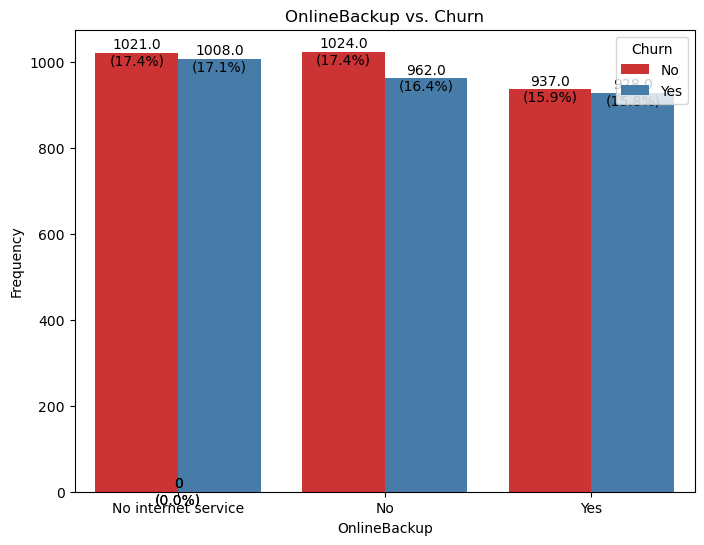

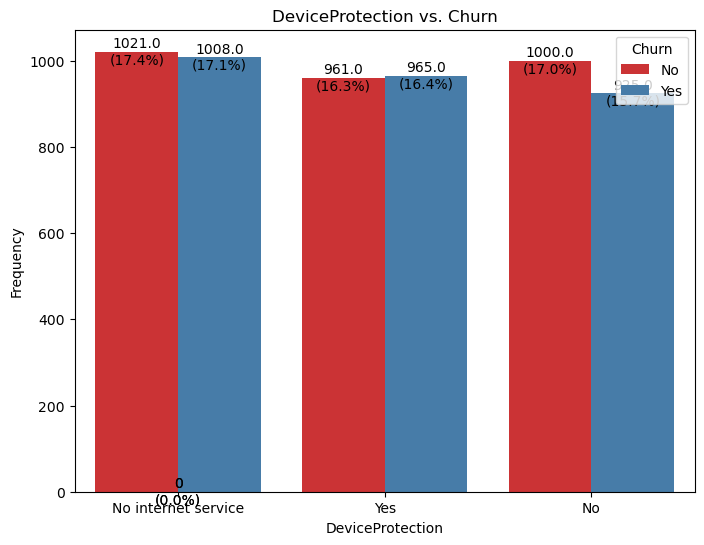

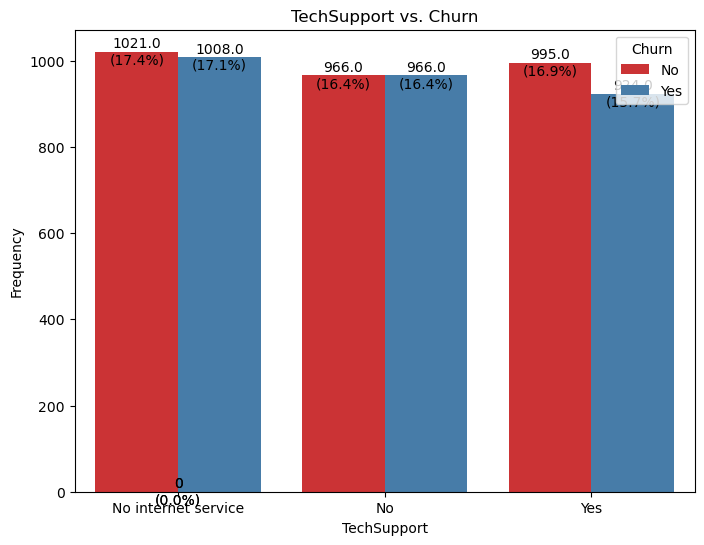

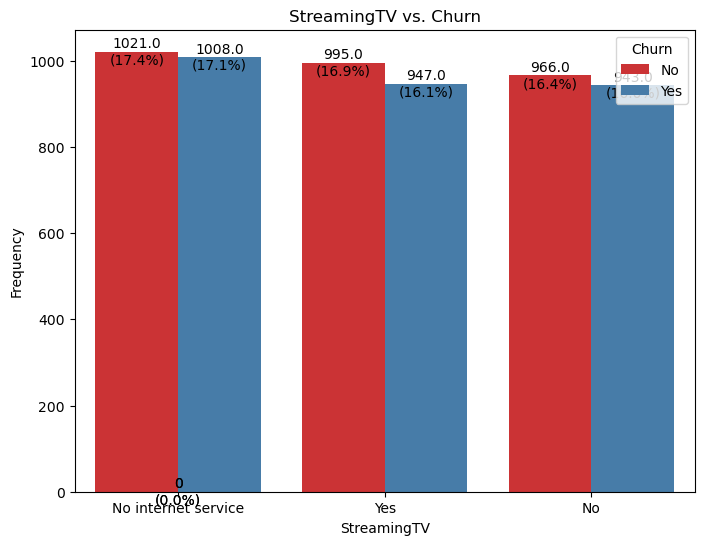

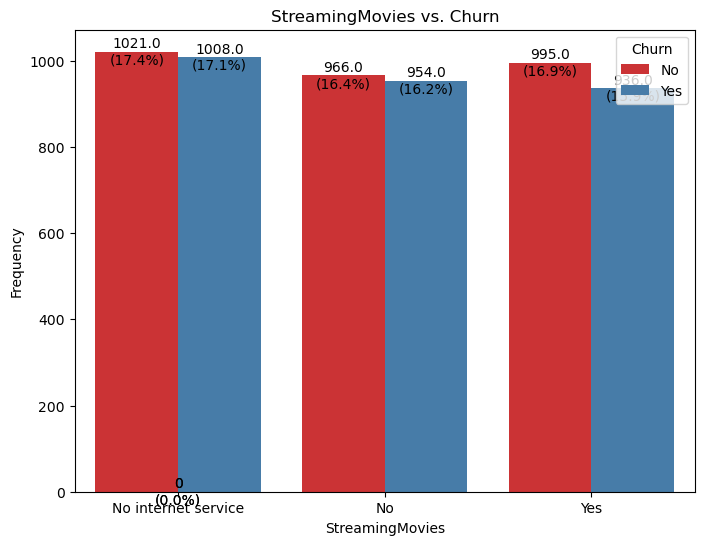

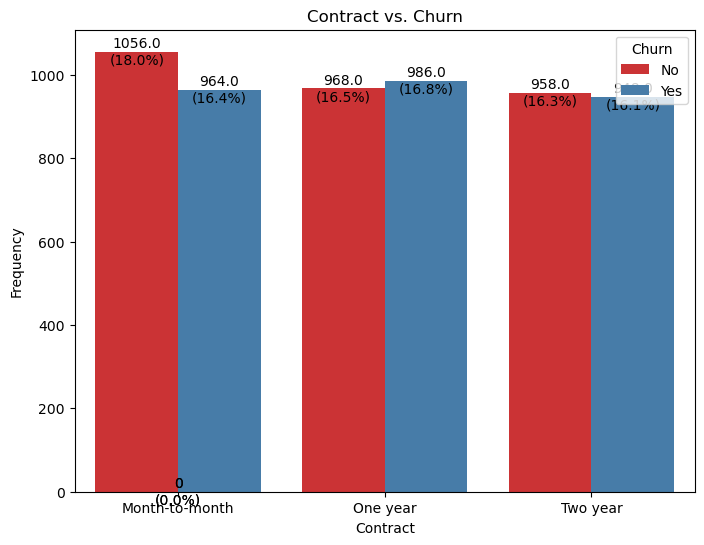

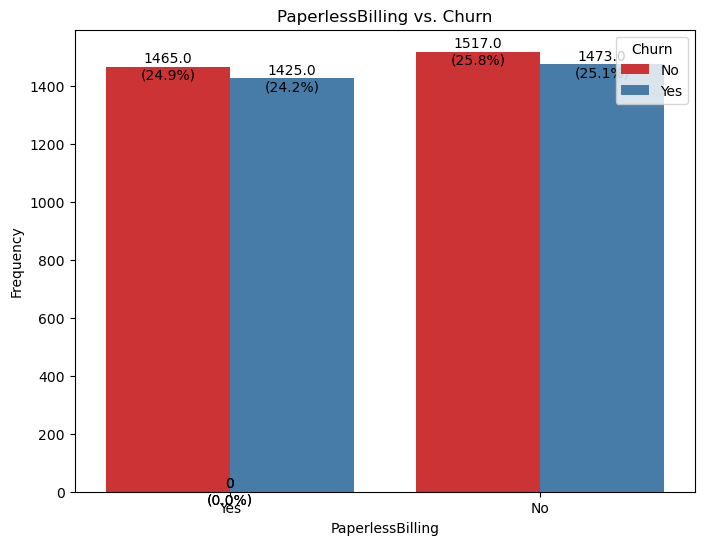

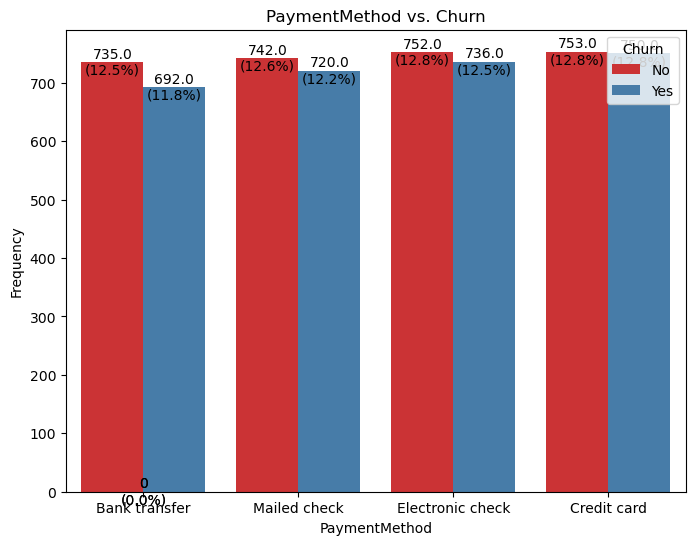

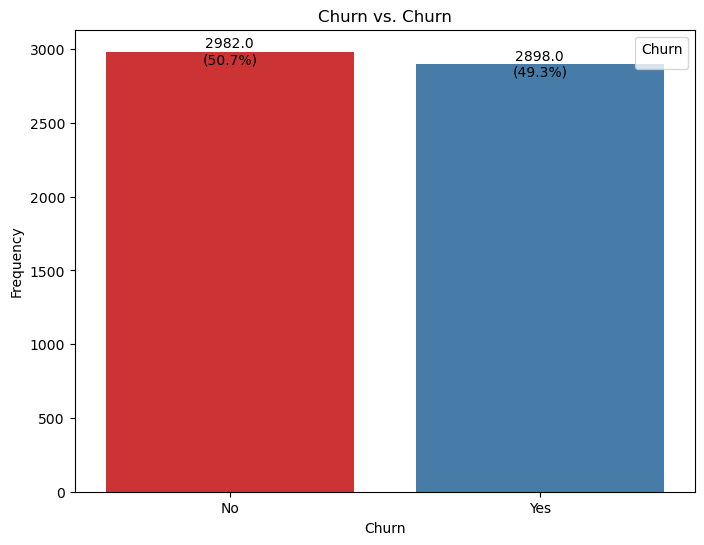

In [ ]:
for col in cat_features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=col, hue='Churn', data=churn_data, palette='Set1')
    plt.title(f'{col} vs. Churn')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Add data labels for count and percentage
    total = len(churn_data[col])  # Total number of observations
    for p in ax.patches:
        height = p.get_height()  # Count of observations for each bar
        ax.text(p.get_x() + p.get_width()/2., height + 0.2,
                f'{height}\n({height / total * 100:.1f}%)',
                ha="center", va="center", fontsize=10, color='black')

    plt.legend(title='Churn', loc='upper right')

plt.show()

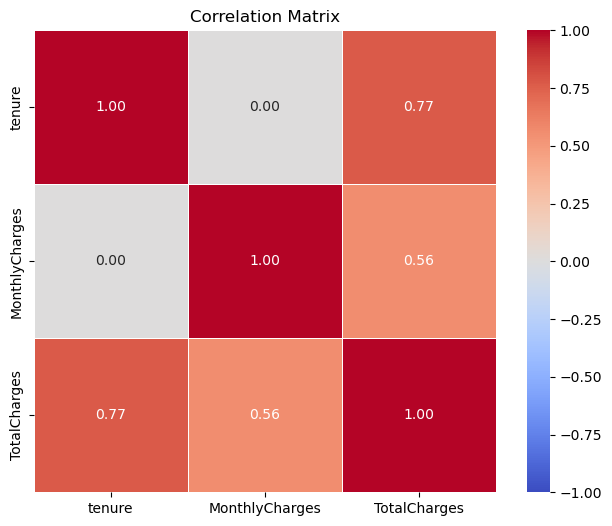

In [ ]:
# Calculate correlation matrix
corr_matrix = numeric_features.corr()

# Plot correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Mean normalization (min-max scaling)

It is important to normalize mean values in order to run effective machine learning models later on.

A `Min-Max Scaling` is typically done via the foloowing equation:

$$X_{norm} = \frac{X_{i} - X_{min}}{X_{max} - X_{min}}$$

$X_i$ is the $i^{th}$ sample of dataset.


We have three columns that neeed to be normalized due to them having too big of a range:

"tenure" - displays number of months the customer has stayed with the company,

"MonthlyCharges" - displays the amount charged to the customer monthly,

"TotalCharges" - The total amount charged to the customer.



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

Scaled_Numeric_features = scaler.fit_transform(numeric_features)

Norm_numeric_features = pd.DataFrame(Scaled_Numeric_features, columns = numeric_features.columns)

Norm_churn_data = pd.concat([Norm_numeric_features, cat_features], axis=1)

print(Norm_churn_data)

Norm_churn_data

        tenure  MonthlyCharges  TotalCharges  gender  SeniorCitizen Partner  \
0     0.309859        0.298530      0.131456    Male              0      No   
1     0.591549        0.807081      0.502951  Female              0     Yes   
2     0.704225        0.773377      0.576902    Male              1      No   
3     1.000000        0.813881      0.849439    Male              1      No   
4     0.338028        0.322232      0.150004    Male              1      No   
...        ...             ...           ...     ...            ...     ...   
5875  0.985915        0.542154      0.612502    Male              0     Yes   
5876  0.295775        0.454345      0.165636    Male              0      No   
5877  0.943662        0.397840      0.472020  Female              0      No   
5878  0.183099        0.718872      0.147766  Female              0     Yes   
5879  0.309859        0.054505      0.065968  Female              1     Yes   

     Dependents PhoneService     MultipleLines Inte

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0.309859,0.298530,0.131456,Male,0,No,Yes,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,No
1,0.591549,0.807081,0.502951,Female,0,Yes,No,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,Yes
2,0.704225,0.773377,0.576902,Male,1,No,No,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Electronic check,Yes
3,1.000000,0.813881,0.849439,Male,1,No,No,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card,No
4,0.338028,0.322232,0.150004,Male,1,No,No,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,0.985915,0.542154,0.612502,Male,0,Yes,Yes,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,No
5876,0.295775,0.454345,0.165636,Male,0,No,No,Yes,Yes,DSL,No,No,Yes,Yes,No,Yes,One year,No,Mailed check,Yes
5877,0.943662,0.397840,0.472020,Female,0,No,No,No,No phone service,Fiber optic,Yes,No,Yes,Yes,Yes,No,One year,Yes,Bank transfer,No
5878,0.183099,0.718872,0.147766,Female,0,Yes,Yes,No,No phone service,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,No


In [ ]:
Norm_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            5880 non-null   float64
 1   MonthlyCharges    5880 non-null   float64
 2   TotalCharges      5880 non-null   float64
 3   gender            5880 non-null   object 
 4   SeniorCitizen     5880 non-null   int64  
 5   Partner           5880 non-null   object 
 6   Dependents        5880 non-null   object 
 7   PhoneService      5880 non-null   object 
 8   MultipleLines     5880 non-null   object 
 9   InternetService   5880 non-null   object 
 10  OnlineSecurity    5880 non-null   object 
 11  OnlineBackup      5880 non-null   object 
 12  DeviceProtection  5880 non-null   object 
 13  TechSupport       5880 non-null   object 
 14  StreamingTV       5880 non-null   object 
 15  StreamingMovies   5880 non-null   object 
 16  Contract          5880 non-null   object 


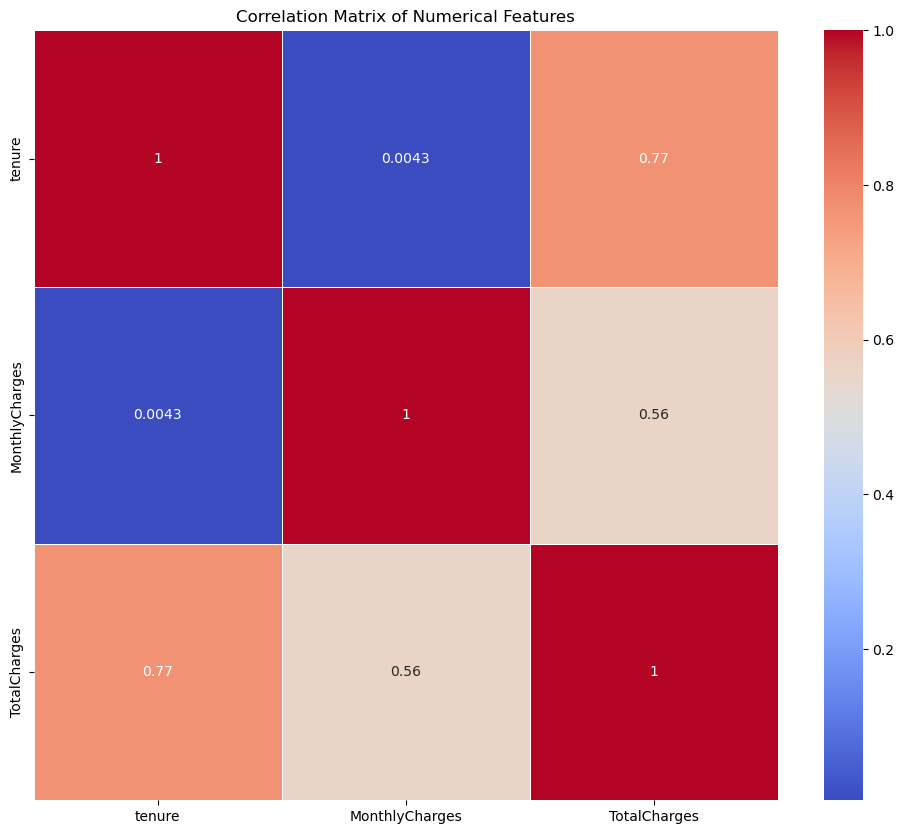

In [ ]:
# Correlation matrix
numerical_features = Norm_churn_data.select_dtypes(include=['float64'])
corr_matrix = numerical_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
# Separate response and predictor variables
X = Norm_churn_data.drop('Churn', axis=1)
y = Norm_churn_data['Churn']

In [ ]:
X = pd.get_dummies(X)
X

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.309859,0.298530,0.131456,0,False,True,True,False,False,True,...,False,True,False,False,False,True,True,False,False,False
1,0.591549,0.807081,0.502951,0,True,False,False,True,True,False,...,False,True,False,False,True,False,False,False,False,True
2,0.704225,0.773377,0.576902,1,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,True,False
3,1.000000,0.813881,0.849439,1,False,True,True,False,True,False,...,False,True,False,False,True,False,False,True,False,False
4,0.338028,0.322232,0.150004,1,False,True,True,False,True,False,...,True,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,0.985915,0.542154,0.612502,0,False,True,False,True,False,True,...,False,True,False,False,False,True,False,False,False,True
5876,0.295775,0.454345,0.165636,0,False,True,True,False,True,False,...,True,False,True,False,True,False,False,False,False,True
5877,0.943662,0.397840,0.472020,0,True,False,True,False,True,False,...,False,False,True,False,False,True,True,False,False,False
5878,0.183099,0.718872,0.147766,0,True,False,False,True,False,True,...,True,True,False,False,False,True,False,False,False,True


In [ ]:
# Split data 70% - 30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [ ]:
# train a logistic regression model on the training data set

modellr = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence
modellr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Step 6: Predictions and model evaluation
y_pred = modellr.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.50


In [ ]:
# Print confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[545 329]
 [554 336]]

Classification Report:
              precision    recall  f1-score   support

          No       0.50      0.62      0.55       874
         Yes       0.51      0.38      0.43       890

    accuracy                           0.50      1764
   macro avg       0.50      0.50      0.49      1764
weighted avg       0.50      0.50      0.49      1764



In [ ]:
# Using a classification model
# Encode categorical variables if needed

from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
for col in X.select_dtypes(include=['object']):
    X[col] = le.fit_transform(X[col])

In [ ]:
# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [ ]:
# train the model (Random Forest Classifier)
modelrfc = RandomForestClassifier(random_state=42)
modelrfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Step 5: Predictions and model evaluation
y_pred = modelrfc.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.50


In [ ]:
# Print confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[492 380]
 [503 389]]

Classification Report:
              precision    recall  f1-score   support

          No       0.49      0.56      0.53       872
         Yes       0.51      0.44      0.47       892

    accuracy                           0.50      1764
   macro avg       0.50      0.50      0.50      1764
weighted avg       0.50      0.50      0.50      1764



In [ ]:
# Calculate ROC-AUC score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

y_prob = modelrfc.predict_proba(X_test)[:, 1]  # Probability predictions for class 1
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC Score: {roc_auc:.2f}')

ROC-AUC Score: 0.51


In [ ]:
# Feature importances for Random forest classifiers
feature_importances = modelrfc.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

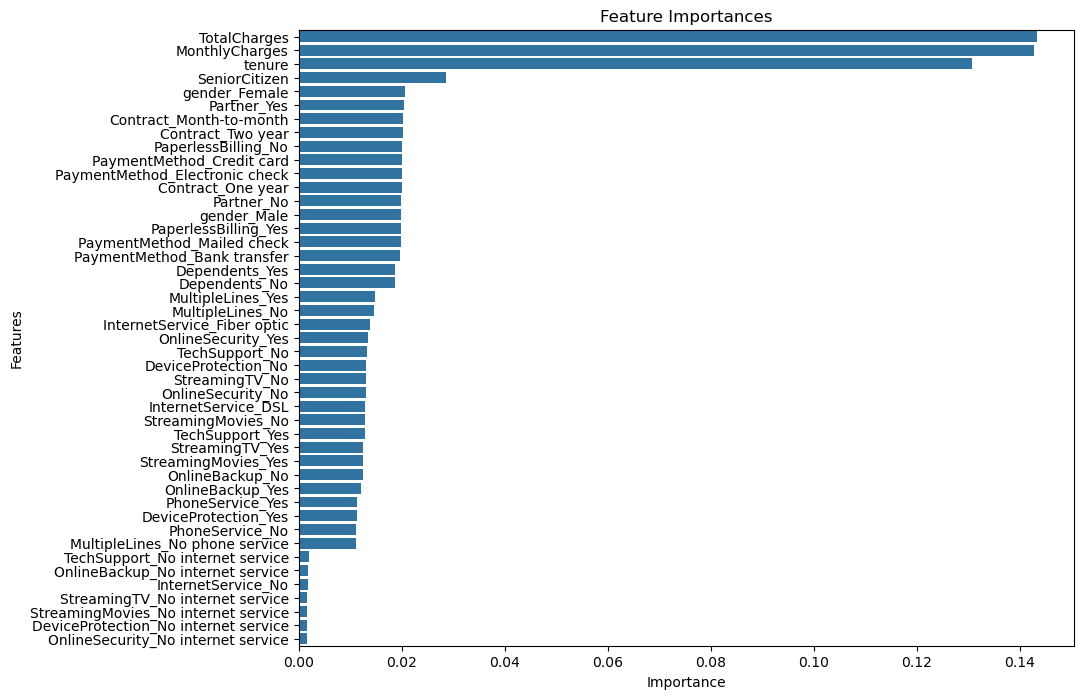

In [ ]:
# Plot feature importances for Random forest classifiers
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
# Feature importances for Logistic Regression Model
coefficients = modellr.coef_[0]
feature_importance = pd.Series(coefficients, index=X.columns).sort_values(ascending=False)
print("Feature Importance (Coefficients):\n", feature_importance)

Feature Importance (Coefficients):
 tenure                                  0.047903
DeviceProtection_Yes                    0.029062
TechSupport_No                          0.027799
Contract_Two year                       0.023920
PaymentMethod_Mailed check              0.021103
OnlineSecurity_No                       0.019965
Partner_Yes                             0.018600
MonthlyCharges                          0.017733
PaymentMethod_Electronic check          0.013079
StreamingMovies_No                      0.010006
Dependents_Yes                          0.009823
PhoneService_No                         0.008673
MultipleLines_No phone service          0.008673
Contract_One year                       0.007837
DeviceProtection_No internet service    0.004175
OnlineSecurity_No internet service      0.004175
StreamingMovies_No internet service     0.004175
StreamingTV_No internet service         0.004175
TechSupport_No internet service         0.004175
OnlineBackup_No internet service 

In [ ]:
# Encode Features to improve model accuracy
# Separate features (X) and target variable (y)
X = Norm_churn_data.drop('Churn', axis=1)  # Features
y = Norm_churn_data['Churn']  # Target variable

# One-Hot Encoding of categorical features
X_encoded = pd.get_dummies(X)

# Display the encoded features
print("Encoded Features:")
print(X_encoded)

Encoded Features:
        tenure  MonthlyCharges  TotalCharges  SeniorCitizen  gender_Female  \
0     0.309859        0.298530      0.131456              0          False   
1     0.591549        0.807081      0.502951              0           True   
2     0.704225        0.773377      0.576902              1          False   
3     1.000000        0.813881      0.849439              1          False   
4     0.338028        0.322232      0.150004              1          False   
...        ...             ...           ...            ...            ...   
5875  0.985915        0.542154      0.612502              0          False   
5876  0.295775        0.454345      0.165636              0          False   
5877  0.943662        0.397840      0.472020              0           True   
5878  0.183099        0.718872      0.147766              0           True   
5879  0.309859        0.054505      0.065968              1           True   

      gender_Male  Partner_No  Partner_Yes  D

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("Shapes of datasets:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")#

Shapes of datasets:
X_train: (4116, 45), y_train: (4116,)
X_test: (1764, 45), y_test: (1764,)


In [ ]:
# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.50
Classification Report:
              precision    recall  f1-score   support

          No       0.50      0.63      0.55       874
         Yes       0.51      0.38      0.43       890

    accuracy                           0.50      1764
   macro avg       0.50      0.50      0.49      1764
weighted avg       0.50      0.50      0.49      1764





Label Encoding:

Label encoding serves the same purpose as mean normalization, which is present data in numeric values to algorithm to run it efficiently.  
In the code below, we are going to map binary values to 1 and 0 respectively.

In [ ]:
# Separate features (X) and target variable (y)
X = Norm_churn_data.drop('Churn', axis=1)  # Features
y = Norm_churn_data['Churn']  # Target variable

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
X_encoded = X.apply(label_encoder.fit_transform)

# Display the encoded features
print("Encoded Features:")
print(X_encoded)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Encoded Features:
      tenure  MonthlyCharges  TotalCharges  gender  SeniorCitizen  Partner  \
0         22            1302          1602       1              0        0   
1         42            3579          4691       0              0        1   
2         50            3423          5007       1              1        0   
3         71            3614          5698       1              1        0   
4         24            1425          1832       1              1        0   
...      ...             ...           ...     ...            ...      ...   
5875      70            2412          5125       1              0        1   
5876      21            2025          2011       1              0        0   
5877      67            1759          4534       0              0        0   
5878      13            3190          1804       0              0        1   
5879      22             241           813       0              1        1   

      Dependents  PhoneService  MultipleLines

c:\Users\klawa\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
